In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import math

In [2]:
columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class']
data_iris = pd.read_csv('iris.data', names = columns)

In [3]:
columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
           "Hue", "OD280/OD315", "Proline"]
data_wine = pd.read_csv('wine.data', names = columns)

In [4]:
data_wine.head(10)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
csm_data = pd.read_excel('CSM.xlsx')

In [6]:
def fill_empty(df, name):
    df[name].fillna(df[name].median(), inplace=True)
    return df

In [7]:
csm_data = fill_empty(csm_data, "Screens")
csm_data = fill_empty(csm_data, "Budget")
csm_data = fill_empty(csm_data, "Aggregate Followers")
csm_data.isnull().sum()

Movie                  0
Year                   0
Ratings                0
Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
dtype: int64

In [8]:
csm_data = csm_data.drop(["Movie", "Year"], axis=1)
csm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ratings              231 non-null    float64
 1   Genre                231 non-null    int64  
 2   Gross                231 non-null    int64  
 3   Budget               231 non-null    float64
 4   Screens              231 non-null    float64
 5   Sequel               231 non-null    int64  
 6   Sentiment            231 non-null    int64  
 7   Views                231 non-null    int64  
 8   Likes                231 non-null    int64  
 9   Dislikes             231 non-null    int64  
 10  Comments             231 non-null    int64  
 11  Aggregate Followers  231 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 21.8 KB


In [9]:
def EqualDiscret(n_part, name_atr, data):
    
    def transf(x):
        min1 = data[name_atr].min()
        max1 = data[name_atr].max()
        return (x - min1) // ((max1 - min1) / n_part) if x < max1 else (n_part - 1)
    
    data[name_atr] = data[name_atr].transform(transf)

In [10]:
columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class']
data_iris3 = pd.read_csv('iris.data', names = columns)

In [11]:
columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
           "Hue", "OD280/OD315", "Proline"]
data_wine3 = pd.read_csv('wine.data', names = columns)

In [12]:
EqualDiscret(4, "Alcohol", data_wine3)
EqualDiscret(4, "Malic acid", data_wine3)
EqualDiscret(4, "Ash", data_wine3)
EqualDiscret(4, "Alcalinity of ash", data_wine3)
EqualDiscret(4, "Magnesium", data_wine3)
EqualDiscret(4, "Total phenols", data_wine3)
EqualDiscret(4, "Flavanoids", data_wine3)
EqualDiscret(4, "Nonflavanoid phenols", data_wine3)
EqualDiscret(4, "Proanthocyanins", data_wine3)
EqualDiscret(4, "Color intensity", data_wine3)
EqualDiscret(4, "Hue", data_wine3)
EqualDiscret(4, "OD280/OD315", data_wine3)
EqualDiscret(4, "Proline", data_wine3)

In [13]:
data_wine3.head(150)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,3.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0
1,1,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0
2,1,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0
3,1,3.0,0.0,2.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,1.0,3.0,3.0
4,1,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
146,3,3.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
147,3,1.0,3.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
148,3,2.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0


In [14]:
EqualDiscret(4, "sepal_l", data_iris3)
EqualDiscret(4, "sepal_w", data_iris3)
EqualDiscret(4, "petal_l", data_iris3)
EqualDiscret(4, "petal_w", data_iris3)

In [15]:
data_iris3.head(150)

,sepal_l,sepal_w,petal_l,petal_w,class
0,0.0,2.0,0.0,0.0,Iris-setosa
1,0.0,1.0,0.0,0.0,Iris-setosa
2,0.0,2.0,0.0,0.0,Iris-setosa
3,0.0,1.0,0.0,0.0,Iris-setosa
4,0.0,2.0,0.0,0.0,Iris-setosa
...,...,...,...,...,...
145,2.0,1.0,2.0,3.0,Iris-virginica
146,2.0,0.0,2.0,2.0,Iris-virginica
147,2.0,1.0,2.0,3.0,Iris-virginica
148,2.0,2.0,2.0,3.0,Iris-virginica


In [16]:
EqualDiscret(4, "Ratings", csm_data)

In [17]:
pd.set_option('display.max_rows', 500)

<function matplotlib.pyplot.show(close=None, block=None)>

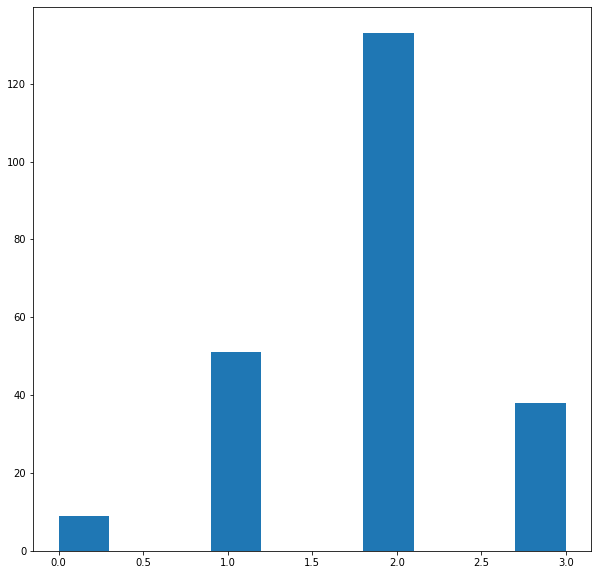

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(csm_data["Ratings"])

plt.show

In [19]:
def NormDS(dataset, list_atr):
    for atr in list_atr:
        dataset[atr] = (dataset[atr] - dataset[atr].min())/(dataset[atr].max() - dataset[atr].min())
    return dataset

In [20]:
data_iris = NormDS(data_iris, ['sepal_l', 'sepal_w', 'petal_l', 'petal_w'])

In [21]:
data_wine = NormDS(data_wine, ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
           "Hue", "OD280/OD315", "Proline"])

In [22]:
csm_data = NormDS(csm_data, ["Genre", "Gross", "Budget", "Screens", "Sequel", "Sentiment", "Views", "Likes", "Dislikes",
                            "Comments", "Aggregate Followers"])

In [65]:
csm_data3 = NormDS(csm_data, ["Genre", "Gross", "Budget", "Screens", "Sequel", "Sentiment", "Views", "Likes", "Dislikes",
                            "Comments", "Aggregate Followers"])

In [66]:
EqualDiscret(4, "Genre", csm_data3)
EqualDiscret(4, "Gross", csm_data3)
EqualDiscret(4, "Budget", csm_data3)
EqualDiscret(4, "Screens", csm_data3)
EqualDiscret(4, "Sequel", csm_data3)
EqualDiscret(4, "Sentiment", csm_data3)
EqualDiscret(4, "Views", csm_data3)
EqualDiscret(4, "Likes", csm_data3)
EqualDiscret(4, "Dislikes", csm_data3)
EqualDiscret(4, "Comments", csm_data3)
EqualDiscret(4, "Aggregate Followers", csm_data3)

In [68]:
csm_data3.head(10)

,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
7,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0


In [69]:
csm_data.head(10)

,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
7,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0


In [24]:
data_iris.head(10)

,sepal_l,sepal_w,petal_l,petal_w,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa


In [25]:
data_wine.head(10)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,1,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,1,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,1,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,1,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


In [26]:
def EuclidianDist(dataset, inst, target):
    distance = dict()
    
    for index, row in dataset.iterrows():
        temp = 0
        for i in dataset.columns.values:
            if i != "class":
                temp = temp + math.pow(inst[i] - row[i], 2)
        
        if temp != 0:
            distance[index] = math.sqrt(temp)
        
    return distance

In [27]:
def KnnOne(dataset, target, instance, k, discrete=True):
    dist = EuclidianDist(dataset, instance, target)
    sorted_keys = sorted(dist, key=dist.get)
    neigh = sorted_keys[:k]
    if discrete:
        return dataset.loc[neigh][target].mode()[0]
    else:
        return dataset.loc[neigh][target].mean()[0]

In [28]:
def KnnOneWeight(dataset, target, instance, k, discrete=True):
    
    dist = EuclidianDist(dataset, instance, target)
    sorted_keys = sorted(dist, key=dist.get)
    neigh = sorted_keys[:k]
    
    if discrete:
        moda = dict()
        
        for i in range(k):
            
            if neigh[i] in moda: 
                moda[neigh[i]] += (1 / math.pow(dist[neigh[i]], 2))
            else:
                moda[neigh[i]] = (1 / math.pow(dist[neigh[i]], 2))
                
        sorted_moda = sorted(moda, key=moda.get)
        result = sorted_keys[0]
        
        return dataset.loc[result][target]
    else:
        return None

In [29]:
def Knn(dataset, target, instances, k, discrete=True):
    output = list()
        
    for i in range(instances.shape[0]):
        output.append(KnnOne(dataset, target, instances.iloc[i], k))
            
    return output

In [30]:
def KnnW(dataset, target, instances, k, discrete=True):
    output = list()
        
    for i in range(instances.shape[0]):
        output.append(KnnOneWeight(dataset, target, instances.iloc[i], k))
            
    return output

In [31]:
def CountClass(dataset, name_col):
    output = dict()
    for i in dataset[name_col]:
        if i in output:
            output[i] += 1
        else:
            output[i] = 1
    return output

In [32]:
def AllGains(dataset, target):
    all_gain = dict()
    
    class_data = CountClass(dataset, target)
    d = sum(list(class_data.values()))
    data = list()
    
    for value in class_data.values():
        data.append(value/d)
    
    entD = entropy(data, base=len(data))
    
    for col in dataset.columns:
        
        if col != target:
            
            ent = entD
            class_d = CountClass(dataset, col)
            
            list_d = list()
            for c in class_d.keys():
                list_d.append(class_d[c])
                
            for cl in class_d.keys():
                ent -= (class_d[cl] / d * entropy(list_d, base=len(list_d)))  
                
            all_gain[col] = ent
    
    return all_gain

In [33]:
AllGains(data_iris3, 'class')

{'sepal_l': 0.0748322939754352,
 'sepal_w': 0.20620289189576851,
 'petal_l': 0.10768223042771088,
 'petal_w': 0.07522229780802417}

In [34]:
def WeightEuclidianDist(dataset, inst, target):
    distance = dict()
    
    all_gain = AllGains(dataset, target)
    
    for index, row in dataset.iterrows():
        temp = 0
        for i in dataset.columns.values:
            if i != "class":
                temp = temp + (math.pow(inst[i] - row[i], 2) * all_gain[i]) # * x
        
        if temp != 0:
            distance[index] = math.sqrt(temp)
        
    return distance

In [35]:
def KnnOneAW(dataset, target, instance, k, discrete=True):
    dist = WeightEuclidianDist(dataset, instance, target)
    sorted_keys = sorted(dist, key=dist.get)
    neigh = sorted_keys[:k]
    if discrete:
        return dataset.loc[neigh][target].mode()[0]
    else:
        return dataset.loc[neigh][target].mean()[0]

In [36]:
def KnnAW(dataset, target, instances, k, discrete=True):
    output = list()
        
    for i in range(instances.shape[0]):
        output.append(KnnOneAW(dataset, target, instances.iloc[i], k))
            
    return output

In [37]:
def KnnOneWAW(dataset, target, instance, k, discrete=True):
    
    dist = WeightEuclidianDist(dataset, instance, target)
    sorted_keys = sorted(dist, key=dist.get)
    neigh = sorted_keys[:k]
    
    if discrete:
        moda = dict()
        
        for i in range(k):
            
            if neigh[i] in moda: 
                moda[neigh[i]] += (1 / math.pow(dist[neigh[i]], 2))
            else:
                moda[neigh[i]] = (1 / math.pow(dist[neigh[i]], 2))
                
        sorted_moda = sorted(moda, key=moda.get)
        result = sorted_keys[0]
        
        return dataset.loc[result][target]
    else:
        return None

In [38]:
def KnnWAW(dataset, target, instances, k, discrete=True):
    output = list()
        
    for i in range(instances.shape[0]):
        output.append(KnnOneWAW(dataset, target, instances.iloc[i], k))
            
    return output 

In [39]:
coef = 0.8
ex = int(data_iris.shape[0] * coef)
data = data_iris.sample(frac=1)
train_data_i, test_data_i = data[:ex], data[ex:]

In [40]:
output = Knn(train_data_i, 'class', test_data_i, 3)

In [41]:
def func1(pred, test_data, class_n):
    temp = 0
    for i in range(test_data.shape[0]):
        if pred[i] == test_data.iloc[i][class_n]:
            temp += 1
    return temp

In [42]:
accuracy = func1(output, test_data_i, 'class')/test_data_i.shape[0] 

In [43]:
accuracy

0.9333333333333333

In [44]:
output1 = KnnW(train_data_i, 'class', test_data_i, 1)

In [45]:
accuracy1 = func1(output1, test_data_i, 'class')/test_data_i.shape[0] 

In [46]:
accuracy1

0.9333333333333333

In [47]:
coef = 0.8
ex = int(data_iris3.shape[0] * coef)
data = data_iris3.sample(frac=1)
train_data_i3, test_data_i3 = data[:ex], data[ex:]

In [48]:
output2 = KnnW(train_data_i3, 'class', test_data_i3, 3)

In [49]:
accuracy2 = func1(output2, test_data_i3, 'class')/test_data_i3.shape[0] 

In [50]:
accuracy2

0.8

In [51]:
coef = 0.8
ex = int(data_iris3.shape[0] * coef)
data = data_iris3.sample(frac=1)
train_data_i4, test_data_i4= data[:ex], data[ex:]

In [52]:
output3 = KnnWAW(train_data_i4, 'class', test_data_i4, 5)

In [53]:
accuracy3 = func1(output3, test_data_i4, 'class')/test_data_i4.shape[0]

In [54]:
accuracy3

0.7333333333333333

In [55]:
coef = 0.8
ex = int(data_iris.shape[0] * coef)
data = data_wine.sample(frac=1)
train_data_w, test_data_w = data[:ex], data[ex:]

In [56]:
coef = 0.8
ex = int(data_iris.shape[0] * coef)
data = data_wine3.sample(frac=1)
train_data_w3, test_data_w3 = data[:ex], data[ex:]

In [57]:
output_w = Knn(train_data_w, 'class', test_data_w, 5)

In [58]:
output_w1 = KnnW(train_data_w, 'class', test_data_w, 5)

In [59]:
output_w2 = KnnAW(train_data_w3, 'class', test_data_w3, 5)

In [60]:
output_w3 = KnnWAW(train_data_w3, 'class', test_data_w3, 5)

In [62]:
accuracy = func1(output_w, test_data_w, 'class')/test_data_w.shape[0] 
accuracy1 = func1(output_w1, test_data_w, 'class')/test_data_w.shape[0] 
accuracy2 = func1(output_w2, test_data_w3, 'class')/test_data_w3.shape[0] 
accuracy3 = func1(output_w3, test_data_w3, 'class')/test_data_w3.shape[0] 

In [63]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.9310344827586207
0.9655172413793104
1.0
0.9827586206896551


In [70]:
coef = 0.8
ex = int(csm_data.shape[0] * coef)
data = csm_data.sample(frac=1)
train_data_c, test_data_c = data[:ex], data[ex:]

In [71]:
coef = 0.8
ex = int(csm_data3.shape[0] * coef)
data = csm_data3.sample(frac=1)
train_data_c3, test_data_c3 = data[:ex], data[ex:]

In [72]:
output_c = Knn(train_data_c, 'Ratings', test_data_c, 5)
output_c1 = Knn(train_data_c, 'Ratings', test_data_c, 5)
output_c2 = Knn(train_data_c3, 'Ratings', test_data_c3, 5)
output_c3 = Knn(train_data_c3, 'Ratings', test_data_c3, 5)

In [74]:
accuracy = func1(output_c, test_data_c, 'Ratings')/test_data_c.shape[0] 
accuracy1 = func1(output_c1, test_data_c, 'Ratings')/test_data_c.shape[0] 
accuracy2 = func1(output_c2, test_data_c3, 'Ratings')/test_data_c3.shape[0] 
accuracy3 = func1(output_c3, test_data_c3, 'Ratings')/test_data_c3.shape[0] 

In [75]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.5531914893617021
0.5531914893617021
0.7446808510638298
0.7446808510638298


In [ ]:
# розделить на 4 части